## Have fun with linear model

Author: hdup  
My contact info:  
hdup [huangdan@youhujia.com](mailto:huangdan@youhujia.com)  
evitself [evitself@gmail.com](mailto:evitself@gmail.com)

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import utils
import models as ml

%matplotlib inline

### Let's play with linear regression

#### Prepare sample data

In [2]:
sample_cnt = 100

train_X = np.linspace(-3.0, 3.0, num=sample_cnt, dtype=np.float32).reshape((sample_cnt, 1))
train_y = train_X * 0.375 + 1.1

print(train_X.shape)

(100, 1)


### Implement with numpy

#### 1), linear regression

epoch: 100, cost:25.001082679688015, W:[[ 0.38395204]], b:0.4001318870929507
epoch: 200, cost:3.347914494584382, W:[[ 0.3753999]], b:0.8438256519208711
epoch: 300, cost:0.4485490582541475, W:[[ 0.37501786]], b:1.006231919469168
epoch: 400, cost:0.060096450123767034, W:[[ 0.3750008]], b:1.0656778658173178
epoch: 500, cost:0.008051702834072758, W:[[ 0.37500004]], b:1.0874370047383337
epoch: 600, cost:0.0010787645277940462, W:[[ 0.375]], b:1.0954015533016834
epoch: 700, cost:0.00014453252074165607, W:[[ 0.375]], b:1.0983168356595105
epoch: 800, cost:1.936442019497322e-05, W:[[ 0.375]], b:1.0993839232864184
epoch: 900, cost:2.594438781136812e-06, W:[[ 0.375]], b:1.0997745118688396
epoch: 1000, cost:3.476021239440019e-07, W:[[ 0.375]], b:1.099917479922138
training finished!
final cost: 3.406848430468343e-07, W: [[ 0.375]], b: 1.099917479922138


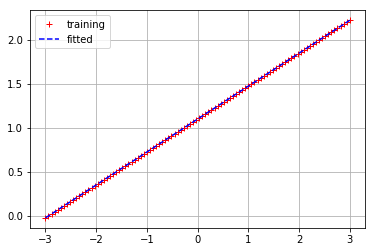

In [3]:
# init parameters
W, b = ml.create_parameters(1)

# batch learning
for epoch in range(0, 1000):
    h = ml.linear_model(train_X, W, b)
    W, b = ml.gd_update(train_X, train_y, h, W, b, ml.mse_cost_dev, lr=0.01)
    if (epoch + 1) % 100 == 0:
        cur_cost = ml.mse_cost(h, train_y)
        print('epoch: {0}, cost:{1}, W:{2}, b:{3}'.format(epoch + 1, cur_cost, W, b))

# finish
predictions = ml.linear_model(train_X, W, b)
final_cost = ml.mse_cost(predictions, train_y)
print('training finished!')
print('final cost: {0}, W: {1}, b: {2}'.format(final_cost, W, b))

# then plot some curves
plt.plot(train_X, train_y, 'r+', label='training')
plt.plot(train_X, predictions, 'b--', label='fitted')
plt.grid(True)
plt.legend()
plt.show()

### Logistic regression (generalized linear model) with numpy

#### 1), prepare label data

In [4]:
train_y_binary = np.array([1.0 if i > 0.5 else 0 for i in train_y]).reshape(sample_cnt, 1)

#### 2), training

epoch: 1000, cost: [ 0.05622545], W: [[ 4.85116317]], b: [ 7.48983889], acc: 0.99
epoch: 2000, cost: [ 0.04431211], W: [[ 6.13219278]], b: [ 9.54027715], acc: 1.0
epoch: 3000, cost: [ 0.03856656], W: [[ 7.03029645]], b: [ 10.97109599], acc: 1.0
epoch: 4000, cost: [ 0.03495107], W: [[ 7.74503986]], b: [ 12.10720806], acc: 1.0
epoch: 5000, cost: [ 0.03238167], W: [[ 8.34856733]], b: [ 13.06521357], acc: 1.0
epoch: 6000, cost: [ 0.03042211], W: [[ 8.87615742]], b: [ 13.90189137], acc: 1.0
epoch: 7000, cost: [ 0.02885687], W: [[ 9.3480112]], b: [ 14.64966324], acc: 1.0
epoch: 8000, cost: [ 0.02756499], W: [[ 9.77690208]], b: [ 15.32898834], acc: 1.0
epoch: 9000, cost: [ 0.02647238], W: [[ 10.17148029]], b: [ 15.95370042], acc: 1.0
epoch: 10000, cost: [ 0.02553069], W: [[ 10.5379072]], b: [ 16.53364084], acc: 1.0
training finished!
final cost: [ 0.02552982], W: [[ 10.5379072]], b: [ 16.53364084], acc: 1.0


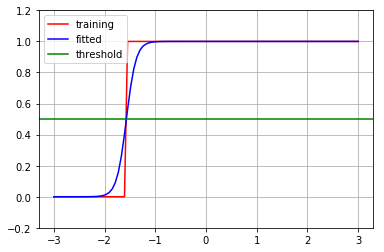

In [6]:
W, b = ml.create_parameters(1)

threshold = 0.5

# batch learning
for epoch in range(0, 10000):
    h = ml.logistic_model(train_X, W, b)
    W, b = ml.gd_update(train_X, train_y_binary, h, W, b, ml.log_cost_dev, lr=0.5)
    if (epoch + 1) % 1000 == 0:
        cur_cost = ml.log_cost(h, train_y_binary)
        acc = ml.binary_accuracy(h, train_y_binary, threshold=threshold)
        print('epoch: {0}, cost: {1}, W: {2}, b: {3}, acc: {4}'.format(epoch + 1, cur_cost, W, b, acc))

# finish
predictions = ml.logistic_model(train_X, W, b)
final_cost = ml.log_cost(predictions, train_y_binary)
final_acc = ml.binary_accuracy(predictions, train_y_binary, threshold=threshold)
print('training finished!')
print('final cost: {0}, W: {1}, b: {2}, acc: {3}'.format(final_cost, W, b, final_acc))

# then plot some curves
plt.plot(train_X, train_y_binary, 'r-', label='training')
plt.plot(train_X, predictions, 'b-', label='fitted')
plt.axhline(y=threshold, color='g', linestyle='-', label='threshold')
plt.grid(True)
plt.ylim([-0.2, 1.2])
plt.legend()
plt.show()

### Time to have fun with cracking captcha with LR model

#### 1), load and prepare data

In [9]:
from utils import corpus, corpus_len, show_img, prepare_data, one_hot_to_label, showcase

In [10]:
train_data = np.load('./data.npz')
train_X=train_data['X']
train_y=train_data['y']
print('shape X {0}, y {1}'.format(train_X.shape, train_y.shape))

validate_data = np.load('./val.npz')
validate_X=validate_data['X']
validate_y=validate_data['y']
print('shape X {0}, y {1}'.format(validate_X.shape, validate_y.shape))

test_data = np.load('./test.npz')
test_X=test_data['X']
test_y=test_data['y']
print('shape X {0}, y {1}'.format(test_X.shape, test_y.shape))

train_X, train_y = prepare_data(train_X, train_y)
validate_X, validate_y = prepare_data(validate_X, validate_y)
test_X, test_y = prepare_data(test_X, test_y)

shape X (100000, 30, 30), y (100000, 26)
shape X (20000, 30, 30), y (20000, 26)
shape X (10000, 30, 30), y (10000, 26)


#### 2), let's take character A as example

You should know one-vs-all

In [11]:
sample_cnt = train_X.shape[0]
feature_cnt = train_X.shape[1] * train_X.shape[2]

train_X_a = train_X.reshape((sample_cnt, feature_cnt))
validate_X_a = validate_X.reshape((validate_X.shape[0], feature_cnt))
test_X_a = test_X.reshape((test_X.shape[0], feature_cnt))

train_y_a = train_y[:,0:1]
validate_y_a = validate_y[:,0:1]
test_y_a = test_y[:,0:1]

print(train_X_a.shape)
print(train_y_a.shape)

(100000, 900)
(100000, 1)


#### 3), training

In [ ]:
threshold = 0.5

W, b = ml.create_parameters(feature_cnt)

epoch_arr = []
cost_arr = []
metric_arr = []

step = 50
batch_size = 20

# mini-batch learning
batch_blocks = sample_cnt / batch_size
for epoch in range(0, 400):
    # launch mini-batch
    batch_start = 0    
    while(batch_start + batch_size < sample_cnt):
        batch_X = train_X_a[batch_start:batch_start+batch_size,:]
        batch_y = train_y_a[batch_start:batch_start+batch_size,:] 
        h = ml.logistic_model(batch_X, W, b)
        W, b = ml.gd_update(batch_X, batch_y, h, W, b, ml.log_cost_dev, lr=0.01)
        batch_start += batch_size
        
    # eval epoch
    if (epoch + 1) % step == 0:
        h = ml.logistic_model(validate_X_a, W, b)
        cur_cost = ml.log_cost(h, validate_y_a)
        cur_conf = ml.binary_confusion_matrix(h, validate_y_a, threshold=threshold)        
        print('epoch: {0}, cost: {1}, val_conf: {2}'.format(epoch + 1, cur_cost, cur_conf))
        epoch_arr.append(epoch + 1)
        cost_arr.append(cur_cost)
        metric_arr.append(cur_conf[2])

# finish
predictions = ml.logistic_model(train_X_a, W, b)
final_cost = ml.log_cost(predictions, train_y_a)
final_conf = ml.binary_confusion_matrix(predictions, train_y_a, threshold=threshold)
print('training finished!')
print('final training cost: {0}, conf: {1}'.format(final_cost, final_conf))

# calculate test conf
test_h = ml.logistic_model(test_X_a, W, b)
test_cost = ml.log_cost(test_h, test_y_a)
test_conf = ml.binary_confusion_matrix(test_h, test_y_a, threshold=threshold)
print('test cost: {0}, conf: {1}'.format(test_cost, test_conf))

# plot learning curve
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.plot(epoch_arr, cost_arr, 'r-', label='cost')
ymax = np.max(cost_arr)
plt.ylim([0.0, ymax * 1.05])
ax1.set_ylabel('cost', color='r')

ax2 = ax1.twinx()
ax2.plot(epoch_arr, metric_arr, 'b-', label='f1')
ymin = np.min(metric_arr)
plt.ylim([ymin-0.02 if ymin-0.02 > 0.0 else 0.0, 1.0])
ax2.set_ylabel('f1', color='b')

plt.axvline(x=0, color='g', linestyle='--')
plt.grid(True)
plt.xlim([-50, epoch + 50])
plt.show()